ML 7. Classify the email using the binary classification method. Email Spam detection has two states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and Support Vector Machine for classification. Analyze their performance.

In [2]:
# Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('emails.csv')
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [8]:
print(df.head())


  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


In [10]:
# Split dataset into features (X) and labels (y)
X = df.drop(columns=['Email No.', 'Prediction'])  # Features: word counts
y = df['Prediction']  # Target: spam (1) or not spam (0)


In [12]:
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', random_state=42, probability=True)  # probability=True for ROC/PR curves

# Train models
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [16]:
# Evaluate models using accuracy, precision, recall, F1-score
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"--- {model_name} ---")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")

    return accuracy, precision, recall, f1

# Evaluate both models
knn_metrics = evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")
svm_metrics = evaluate_model(y_test, y_pred_svm, "Support Vector Machine")

--- K-Nearest Neighbors ---
Accuracy:  0.8628
Precision: 0.7251
Recall:    0.8378
F1-Score:  0.7774
--- Support Vector Machine ---
Accuracy:  0.9594
Precision: 0.9205
Recall:    0.9392
F1-Score:  0.9298


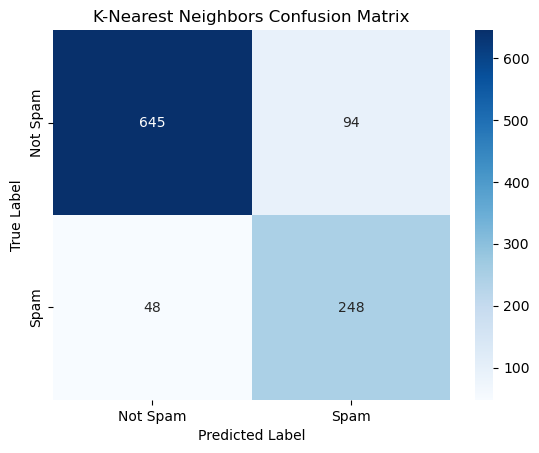

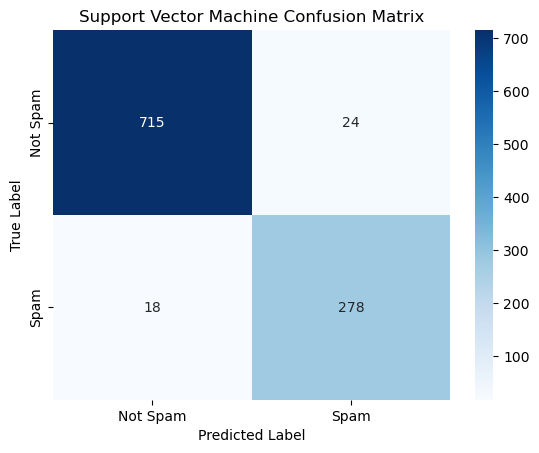

In [18]:

# Confusion Matrix for both models
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    disp.set_title(f"{model_name} Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine")


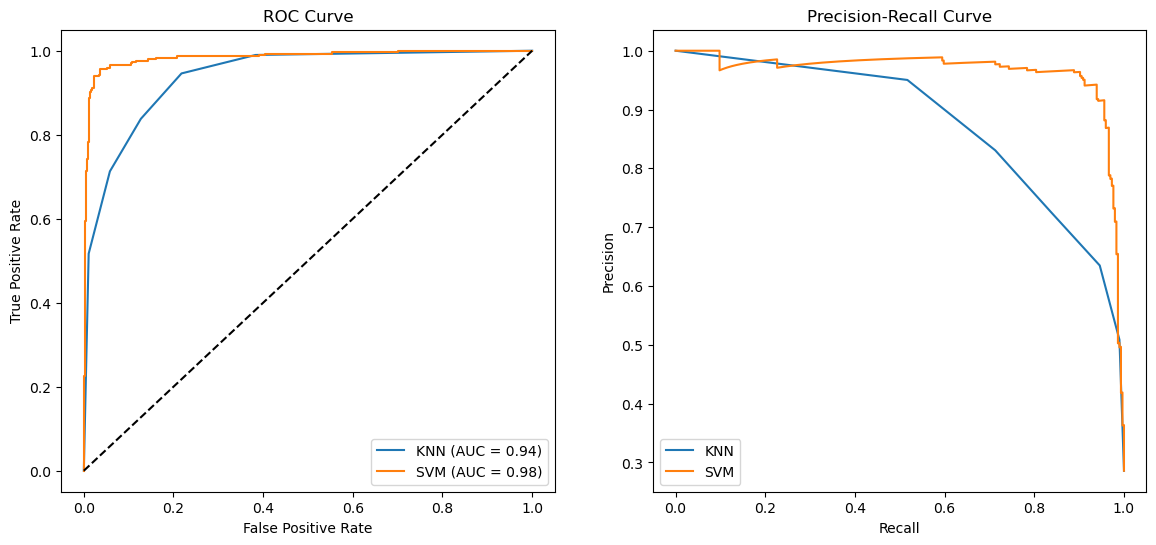

In [20]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# ROC Curve and Precision-Recall Curve
def plot_roc_pr_curve(y_true, y_scores_knn, y_scores_svm):
    # ROC Curve
    fpr_knn, tpr_knn, _ = roc_curve(y_true, y_scores_knn)
    fpr_svm, tpr_svm, _ = roc_curve(y_true, y_scores_svm)

    auc_knn = auc(fpr_knn, tpr_knn)
    auc_svm = auc(fpr_svm, tpr_svm)

    # Plot ROC Curve
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
    plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # Precision-Recall Curve
    precision_knn, recall_knn, _ = precision_recall_curve(y_true, y_scores_knn)
    precision_svm, recall_svm, _ = precision_recall_curve(y_true, y_scores_svm)

    plt.subplot(1, 2, 2)
    plt.plot(recall_knn, precision_knn, label='KNN')
    plt.plot(recall_svm, precision_svm, label='SVM')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

    plt.show()

# Get prediction probabilities for ROC/PR curves (SVM requires decision function or predict_proba)
y_scores_knn = knn.predict_proba(X_test)[:, 1]
y_scores_svm = svm.predict_proba(X_test)[:, 1]

plot_roc_pr_curve(y_test, y_scores_knn, y_scores_svm)


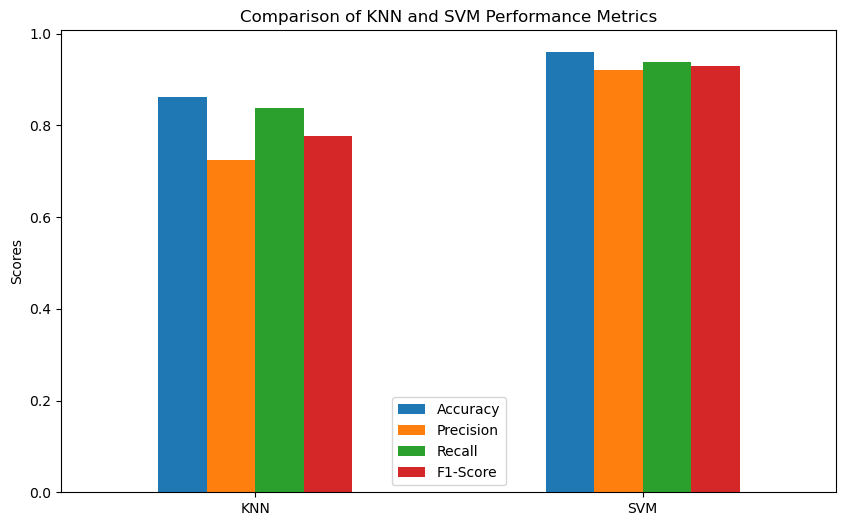

In [22]:

# Comparing models: Bar chart of metrics
metrics_df = pd.DataFrame([knn_metrics, svm_metrics], columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=['KNN', 'SVM'])
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of KNN and SVM Performance Metrics")
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.show()